<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

Passive Aggressive Regressor with Scale

This Code template is for the regression analysis using a simple PassiveAggresiveRegressor based on the passive-aggressive algorithms and the feature rescaling technique used is Scale. Passive-aggressive algorithms are a group of algorithms for large-scale learning.

### Required Packages

In [17]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.linear_model import PassiveAggressiveRegressor
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [18]:
#filepath
file_path= ""

List of features which are  required for model training .

In [19]:
#x_values
features=[]    

Target feature for prediction.

In [20]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [21]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [22]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [23]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

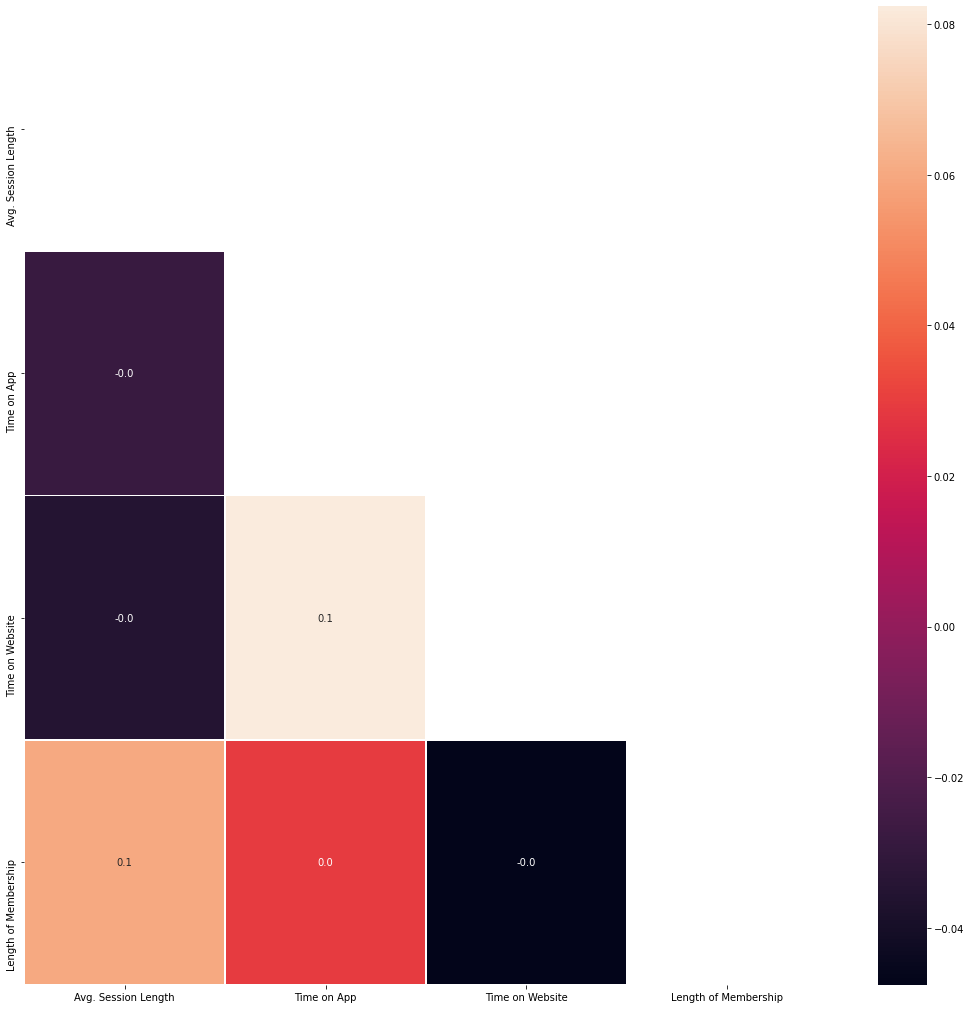

In [24]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)


###Data Scaling

sklearn.preprocessing.scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)

Standardize a dataset along any axis. Center to the mean and component wise scale to unit variance.

Read more at [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)


In [26]:
x_train=scale(x_train) 
x_test=scale(x_test)

### Model

The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate. However, contrary to the Perceptron, they include a regularization parameter C

> **C** ->Maximum step size (regularization). Defaults to 1.0.

> **max_iter** ->The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method.

> **tol**->The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).

> **early_stopping**->Whether to use early stopping to terminate training when validation. score is not improving. If set to True, it will automatically set aside a fraction of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs.

> **validation_fraction**->The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.

> **n_iter_no_change**->Number of iterations with no improvement to wait before early stopping.

> **shuffle**->Whether or not the training data should be shuffled after each epoch.

> **loss**->The loss function to be used: epsilon_insensitive: equivalent to PA-I in the reference paper. squared_epsilon_insensitive: equivalent to PA-II in the reference paper.

> **epsilon**->If the difference between the current prediction and the correct label is below this threshold, the model is not updated.

In [27]:
model = PassiveAggressiveRegressor(random_state=123)
model.fit(x_train,y_train)

PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=123, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.


In [28]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 97.87 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [29]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 97.87 %
Mean Absolute Error 9.51
Mean Squared Error 146.29


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

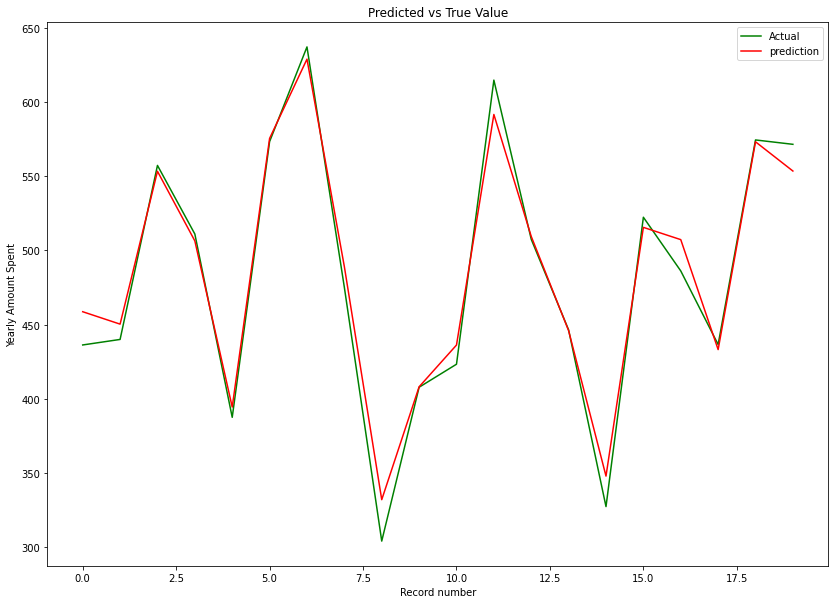

In [30]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),y_pred[0:20], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Arpit Somani , Github: [Profile](https://github.com/arpitsomani8)